In [19]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

print("Libraries Imported")

Libraries Imported


In [20]:
# Creating global data frame of the skins within the case
# Data taken from data set made from snap shot of market
snake_bite_skins = pd.read_csv('Snake_Bite_Skins.csv')
snake_bite_skins.head()

,Skin Name,Skin Position,Rarity,StatTrak,Condition,Price
0,SG 553 | Heavy Metal,1,Blue,No,Battle-Scarred,0.17
1,SG 553 | Heavy Metal,1,Blue,No,Well-Worn,0.18
2,SG 553 | Heavy Metal,1,Blue,No,Field-Tested,0.19
3,SG 553 | Heavy Metal,1,Blue,No,Minimal Wear,0.31
4,SG 553 | Heavy Metal,1,Blue,No,Factory New,0.77


In [39]:
# Custom function to simulate opening cases, takes paramaters of how many cases openings and number of cases per opening
# The function will loop through through every case opening, and every case in that opening
# Varaibles initialized to hold skins opened, total price of skins when sold, total opening cost, and net balance
# Variables for every case are string for skin rarity, int for position, string for condition, name, and stratTrak value
# Randomly generate skin rarity, skin position based on rarity, conidtion, and whether its statTrak
# Add outcomes to the respect arrays for each opening then loop again
# Print graph of net balance of each opening
def open_cases(number_of_iterations, number_of_openings):
    overall_skin_rarity_arr = [0] * 5
    overall_skin_condition_arr = [0] * 5
    overall_skin_stattrak_arr = [0] * 2
    iteration_arr = [0] * number_of_iterations
    for y in range(number_of_iterations):
        # Initialize array for skin rarities pulled during opening
        # [0] is blue, [1] is purple, [2] is pink, [3], is red, and [4] is red
        skin_rarity_arr = [0] * 5
        # Initialize variable to hold total skin value opened
        total_price_skins = 0
        # Initialize variable to hold price to open all cases, 0.5 is case price and 3.39 is key price
        total_case_cost = (number_of_openings*(0.5+3.39))
        # Initialize variable to hold net balance after openings
        overall_balance = 0

        for x in range(number_of_openings):
            # Initialize variable to hold skin rarity: blue, purple, pink, red, or gold
            skin_rarity = ""
            # Initialize variable to hold skin position in dataset dependent on number of skins per rarity
            skin_position = 0
            # Initialize variable to hold skin conidtions: battle-scarred, well-worn, field-tested, minimal wear, factory new
            skin_conidition = ""
            # Initialie variable to hold skin price
            skin_price = 0
            # Initialize variable to hold skin name
            skin_name = ""
            # Initialize varibale to hold whether the skin is statTrack or not
            skin_stattrak = ""

            rng = round(rnd.uniform(0, 100), 2)

            # 0.26% to get gold
            if rng > 0 and rng <= 0.26:
                skin_rarity = "Gold"
                skin_rarity_arr[4] += 1
                overall_skin_rarity_arr[4] += 1
            # 0.64% to get red
            elif rng > 0.26 and rng <= 0.9:
                skin_rarity = "Red"
                skin_rarity_arr[3] += 1
                overall_skin_rarity_arr[3] += 1
            # 3.2% to get pink
            elif rng > 0.9 and rng <= 4.1:
                skin_rarity = "Pink"
                skin_rarity_arr[2] += 1
                overall_skin_rarity_arr[2] += 1
            # 15.98% to get purple
            elif rng > 4.1 and rng <= 20.08:
                skin_rarity = "Purple"
                skin_rarity_arr[1] += 1
                overall_skin_rarity_arr[1] += 1
            # 79.92% to get blue
            else:
                skin_rarity = "Blue"
                skin_rarity_arr[0] += 1
                overall_skin_rarity_arr[0] += 1

            if skin_rarity == "Gold":
                skin_position = rnd.randint(1, 24)
            elif skin_rarity == "Red":
                skin_position = rnd.randint(1, 2)
            elif skin_rarity == "Pink":
                skin_position = rnd.randint(1, 3)
            elif skin_rarity == "Purple":
                skin_position = rnd.randint(1, 5)
            else:
                skin_position = rnd.randint(1, 7)

            rng = round(rnd.uniform(0, 100), 2)

            # 9.93% to get battle-scarred
            if rng > 0 and rng <= 9.93:
                skin_condition = "Battle-Scarred"
                overall_skin_condition_arr[0] += 1
            # 7.92% to get well-worn
            elif rng > 9.93 and rng <= 17.85:
                skin_condition = "Well-Worn"
                overall_skin_condition_arr[1] += 1
            # 43.18% to get field-tested
            elif rng > 17.85 and rng <= 61.03:
                skin_condition = "Field-Tested"
                overall_skin_condition_arr[2] += 1
            # 24.68% to get miminal wear
            elif rng > 61.03 and rng <= 85.71:
                skin_condition = "Minimal Wear"
                overall_skin_condition_arr[3] += 1
            # 14.71% to get factory new
            else:
                skin_condition = "Factory New"
                overall_skin_condition_arr[4] += 1

            rng = round(rnd.uniform(0, 100), 2)

            if rng > 0 and rng <= 10.09 and skin_rarity != "Gold":
                skin_stattrak = "Yes"
                overall_skin_stattrak_arr[1] += 1
            else:
                skin_stattrak = "No"
                overall_skin_stattrak_arr[0] += 1

            skin_price = snake_bite_skins.loc[(snake_bite_skins['Skin Position'] == skin_position) & (snake_bite_skins['Rarity'] == skin_rarity) & (snake_bite_skins['StatTrak'] == skin_stattrak) & (snake_bite_skins['Condition'] == skin_condition), 'Price'].values[0]

            total_price_skins += skin_price

            skin_name = snake_bite_skins.loc[(snake_bite_skins['Skin Position'] == skin_position) & (snake_bite_skins['Rarity'] == skin_rarity) & (snake_bite_skins['StatTrak'] == skin_stattrak) & (snake_bite_skins['Condition'] == skin_condition), 'Skin Name '].values[0]

            if skin_stattrak == 'Yes':
                print("Opened: " + skin_rarity + " StatTrak " + skin_name + " in condition: " + skin_condition + ", price is: " + str(skin_price))
            else:
                print("Opened: " + skin_rarity + " " + skin_name + " in condition: " + skin_condition + ", price is: $" + str(skin_price))

            print("")

        overall_balance = total_price_skins - total_case_cost

        print("Number of blues opened: " + str(skin_rarity_arr[0]))
        print("Number of purples opened: " + str(skin_rarity_arr[1]))
        print("Number of pinks opened: " + str(skin_rarity_arr[2]))
        print("Number of reds opened: " + str(skin_rarity_arr[3]))
        print("Number of golds opened: " + str(skin_rarity_arr[4]))
        print("Price to open cases: $" + str(format(total_case_cost, ".2f")))
        print("Money gained opening cases: $" + str(format(total_price_skins, ".2f")))
        print("Net Balance: $" + str(format(overall_balance, ".2f")))
        
        iteration_arr[y] = format(overall_balance, ".2f")
        
        if overall_balance < 0:
            plt.bar((y+1), overall_balance, color="red")
        else:
            plt.bar((y+1), overall_balance, color="green")
        
    plt.title("Net balances after openings")
    plt.xlabel("Opening number")
    plt.ylabel("Value gained/lost")
    plt.show()
    
    iteration_arr = np.array(iteration_arr, dtype=float)
    mean = np.mean(iteration_arr)
    print("The amount after averaging all sessions is: $" + str(format(mean, ".2f")))
    
    plt.clf()
    plt.title("Skins rarities opened")
    plt.xlabel("Rarity")
    plt.ylabel("Number opened")
    
    plt.bar("blue", overall_skin_rarity_arr[0], color="blue")
    plt.bar("purple", overall_skin_rarity_arr[1], color="purple")
    plt.bar("pink", overall_skin_rarity_arr[2], color="pink")
    plt.bar("red", overall_skin_rarity_arr[3], color="red")
    plt.bar("gold", overall_skin_rarity_arr[4], color="yellow")
    
    plt.show()
    
    print("Number of blues opened: " + str(overall_skin_rarity_arr[0]))
    print("Number of purples opened: " + str(overall_skin_rarity_arr[1]))
    print("Number of pinks opened: " + str(overall_skin_rarity_arr[2]))
    print("Number of reds opened: " + str(overall_skin_rarity_arr[3]))
    print("Number of golds opened: " + str(overall_skin_rarity_arr[4]))
    
    plt.clf()
    plt.title("Skins conidtions opened")
    plt.xlabel("Conditions")
    plt.ylabel("Number opened")
    
    plt.bar("BS", overall_skin_condition_arr[0], color="blue")
    plt.bar("WW", overall_skin_condition_arr[1], color="blue")
    plt.bar("FT", overall_skin_condition_arr[2], color="blue")
    plt.bar("MW", overall_skin_condition_arr[3], color="blue")
    plt.bar("FN", overall_skin_condition_arr[4], color="blue")
    
    plt.show()
    
    print("Number of Battle-Scarred opened: " + str(overall_skin_condition_arr[0]))
    print("Number of Well-Worn opened: " + str(overall_skin_condition_arr[1]))
    print("Number of Field-Tested opened: " + str(overall_skin_condition_arr[2]))
    print("Number of Minimal Wear opened: " + str(overall_skin_condition_arr[3]))
    print("Number of Factory New opened: " + str(overall_skin_condition_arr[4]))
    
    plt.clf()
    plt.title("StatTrak skin opened")
    plt.xlabel("StatTrak")
    plt.ylabel("Number opened")
    
    plt.bar("No", overall_skin_stattrak_arr[0], color="grey")
    plt.bar("Yes", overall_skin_stattrak_arr[1], color="orange")
    
    plt.show()
    
    print("Number of non StatTrak opened: " + str(overall_skin_stattrak_arr[0]))
    print("Number of StatTrak opened: " + str(overall_skin_stattrak_arr[1]))
    
print("Custom Functions Created")

Custom Functions Created


Opened: Blue UMP-45 | Oscillator in condition: Minimal Wear, price is: $0.3

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue SG 553 | Heavy Metal in condition: Battle-Scarred, price is: $0.17

Opened: Blue Glock-18 | Clear Polymer in condition: Factory New, price is: $0.94

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue Glock-18 | Clear Polymer in condition: Minimal Wear, price is: $0.31

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Blue StatTrak Nova | Windblown in condition: Field-Tested, price is: 0.52

Opened: Blue SG 553 | Heavy Metal in condition: Field-Tested, price is: $0.19

Opened: Blue Glock-18 | Clear Polymer in condition: Battle-Scarred, price is: $0.19

Opened: Blue R8 Revolver | Junk Yard in

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue M249 | O.S.I.P.R. in condition: Minimal Wear, price is: $0.31

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Blue SG 553 | Heavy Metal in condition: Battle-Scarred, price is: $0.17

Opened: Blue Glock-18 | Clear Polymer in condition: Well-Worn, price is: $0.19

Opened: Blue StatTrak R8 Revolver | Junk Yard in condition: Minimal Wear, price is: 0.96

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue CZ75-Auto | Circaetus in condition: Battle-Scarred, price is: $0.18

Opened: Blue SG 553 | Heavy Metal in condition: Minimal Wear, price is: $0.31

Opened: Pink XM1014 | XOXO in condition: Field-Tested, price is: $2.79

Opened: Blue CZ75-Auto | Circaetus in condition

Opened: Purple AK-47 | Slate in condition: Field-Tested, price is: $5.15

Opened: Purple MAC-10 | Button Masher in condition: Field-Tested, price is: $0.7

Opened: Purple P250 | Cyber Shell in condition: Minimal Wear, price is: $0.96

Opened: Blue M249 | O.S.I.P.R. in condition: Minimal Wear, price is: $0.31

Opened: Blue StatTrak SG 553 | Heavy Metal in condition: Minimal Wear, price is: 0.89

Opened: Blue Nova | Windblown in condition: Factory New, price is: $0.6

Opened: Blue M249 | O.S.I.P.R. in condition: Well-Worn, price is: $0.19

Opened: Blue Nova | Windblown in condition: Minimal Wear, price is: $0.31

Opened: Blue SG 553 | Heavy Metal in condition: Minimal Wear, price is: $0.31

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue Nova | Windblown in condition: Well-Worn, price is: $0.29

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue M249 | O.S.I.P.R. in condition: Field-Tested, price is: $0.

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Purple MAC-10 | Button Masher in condition: Minimal Wear, price is: $0.95

Opened: Purple Negev | dev_texture in condition: Field-Tested, price is: $0.54

Opened: Blue SG 553 | Heavy Metal in condition: Minimal Wear, price is: $0.31

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue UMP-45 | Oscillator in condition: Well-Worn, price is: $0.19

Opened: Blue UMP-45 | Oscillator in condition: Field-Tested, price is: $0.19

Opened: Blue UMP-45 | Oscillator in condition: Factory New, price is: $0.6

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue UMP-45 | Oscillator in condition: Factory N

Opened: Pink MP9 | Food Chain in condition: Factory New, price is: $14.4

Opened: Blue SG 553 | Heavy Metal in condition: Minimal Wear, price is: $0.31

Opened: Purple Negev | dev_texture in condition: Field-Tested, price is: $0.54

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Purple StatTrak MAC-10 | Button Masher in condition: Well-Worn, price is: 0.7

Opened: Purple StatTrak P250 | Cyber Shell in condition: Field-Tested, price is: 0.83

Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue StatTrak CZ75-Auto | Circaetus in condition: Battle-Scarred, price is: 0.52

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Blue Glock-18 

Opened: Purple MAC-10 | Button Masher in condition: Minimal Wear, price is: $0.95

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue M249 | O.S.I.P.R. in condition: Field-Tested, price is: $0.19

Opened: Blue CZ75-Auto | Circaetus in condition: Field-Tested, price is: $0.18

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Purple P250 | Cyber Shell in condition: Well-Worn, price is: $0.54

Opened: Blue SG 553 | Heavy Metal in condition: Factory New, price is: $0.77

Opened: Blue M249 | O.S.I.P.R. in condition: Well-Worn, price is: $0.19

Number of blues opened: 81
Number of purples opened: 17
Number of pinks opened: 2
Number of reds opened: 0
Number of golds opened: 0
Price to open cases: $389.00
Money gained opening cases: $69.82
Net Balance: $-319.18
Opened: Blue CZ75-Auto | Circaetus in condition: Minimal Wear, price is: $0.31

Opened: Blue Nova | Windblown in condition: Minimal Wear, price is: $0.31

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue UMP-45 | Oscillator in condition: Factory New, price is: $0.6

Opened: Blue UMP-45 | Oscillator in condition: Minimal Wear, price is: $0.3

Opened: Blue M249 | O.S.I.P.R. in condition: Battle-Scarred, price is: $0.2

Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue Glock-18 | Clear Polymer in condition: Field-Tested, price is: $0.18

Opened: Blue Nova | Windblown in condition: Minimal Wear, price is: $0.31

Number of blues opened: 81
Number of purples opened: 12
Number of pinks opened: 6
Number of reds opened: 1
Number of golds opened: 0
Price to open cases: $389.00
Money gained opening cases: $122.61
Net Balance: $-266.39
Opened: Purple StatTrak MAC-10 | Button Masher in condition: Minimal Wear, price is: 1.8

Opened: Blue StatTrak CZ75-Auto | Circaetus in condition: Field-Tested, price is: 0.49

Opened: Blue SG 553 | Heavy Metal in condition: Field-Teste


Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue UMP-45 | Oscillator in condition: Minimal Wear, price is: $0.3

Opened: Purple P250 | Cyber Shell in condition: Field-Tested, price is: $0.52

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Purple MAC-10 | Button Masher in condition: Battle-Scarred, price is: $0.49

Opened: Purple AK-47 | Slate in condition: Field-Tested, price is: $5.15

Opened: Pink Galil AR | Chromatic Aberration in condition: Minimal Wear, price is: $5.87

Opened: Pink Galil AR | Chromatic Aberration in condition: Minimal Wear, price is: $5.87

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue CZ75-Auto | Circaetus in condition: Battle-Scarred, price is: $0.18

Opened: Blue R8 Revolver | Junk Yard in condition: Field-Tested, price is: $0.2

Opened: Blue CZ75-Auto | Circaetus in

Opened: Blue CZ75-Auto | Circaetus in condition: Factory New, price is: $0.74

Opened: Blue M249 | O.S.I.P.R. in condition: Field-Tested, price is: $0.19

Opened: Blue StatTrak M249 | O.S.I.P.R. in condition: Field-Tested, price is: 0.53

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue R8 Revolver | Junk Yard in condition: Factory New, price is: $0.74

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue Nova | Windblown in condition: Field-Tested, price is: $0.27

Opened: Blue M249 | O.S.I.P.R. in condition: Well-Worn, price is: $0.19

Opened: Blue M249 | O.S.I.P.R. in condition: Battle-Scarred, price is: $0.2

Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue M249 | O.S.I.P.R. in condition: Factory New, price is: $0.6

Opened: Blue R8 Revolver | Junk Yard in condition: Minimal Wear, price is: $0.3

Opened: Purple Negev | dev_texture in condition: Field-Tested, price is: $0.

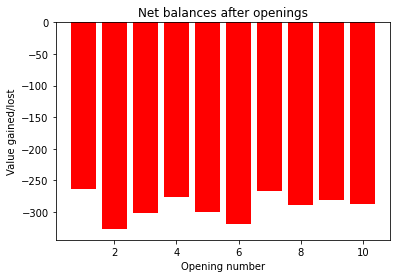

The amount after averaging all sessions is: $-290.80


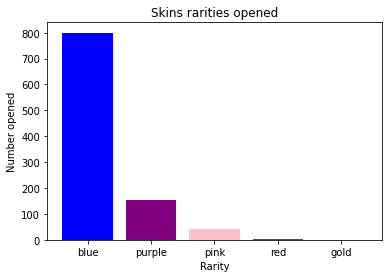

Number of blues opened: 800
Number of purples opened: 155
Number of pinks opened: 41
Number of reds opened: 4
Number of golds opened: 0


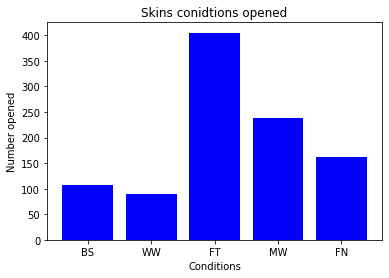

Number of Battle-Scarred opened: 107
Number of Well-Worn opened: 89
Number of Field-Tested opened: 405
Number of Minimal Wear opened: 238
Number of Factory New opened: 161


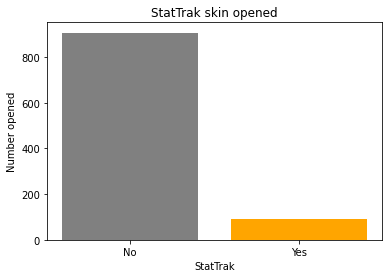

Number of non StatTrak opened: 907
Number of StatTrak opened: 93


In [40]:
data_points = open_cases(10, 100)